
# 项目：调查最受欢迎的电影信息

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 该数据集中包含了以下相关的电影信息，电影欢迎度，预算，收益，电影名称，演员列表，网站主页，导演，标签，关键词，电影概述，电影时长，以及电影类型，出品公司，发布日期

In [1]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import pandas as pd
% matplotlib inline
# 务必包含一个‘magic word’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
movie_df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## 数据整理


### 常规属性

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
movie_df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
#   类型，以及是否有缺失数据或错误数据的情况。
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
movie_df['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

### 数据清理  将类型的种类标注在数据上

* 清除掉电影类型为nan的数据，因为它对于分析哪种类型的电影最受欢迎不具有参考价值

In [6]:
movie_df.dropna(axis=0, inplace=True, subset=list(['genres']))

* 清除掉年份为nan的数据，因为它对于分析最受欢迎的类型的电影的出品年份无意义

In [7]:
movie_df.dropna(axis=0, inplace=True, subset=list(['release_year']))

In [8]:

# 由于一个电影有多个类型，每个电影的导演可能是多个，所以进行列拆分，拆分为多行

def deal_columns_to_rows(movie_df, columnName):
    movie_type_df = movie_df[columnName].str.split('|', expand=True)

    movie_type_df['id'] = movie_df['id']
    
    movie_df_merged = movie_df.merge(movie_type_df)
    
    movie_df_merged.drop_duplicates(subset=None, keep='first', inplace=True)
    
    movie_column = movie_df.columns.values.tolist()
    
    movie_column.remove(columnName)
    
    melted = pd.melt(movie_df_merged, id_vars=movie_column, value_vars=[0, 1, 2, 3, 4],
                     value_name=columnName+'_uniq').drop('variable', axis = 1).dropna()
    
    return melted


<a id='eda'></a>
## 探索性数据分析


### 研究问题 1  根据电影种类，统计出最受欢迎的电影类型

*  统计出各类电影的欢迎程度的评分图表

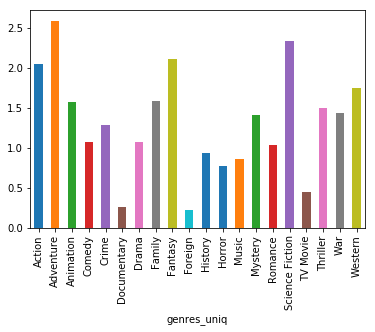

In [9]:
# 用这个代码框和其它代码框探索数据。请务必记得添加
#   Markdown 框，以便记录你的观察和调查结果。
melted = deal_columns_to_rows(movie_df, 'genres')

dealed_df = melted.copy()

"""
根据电影种类，统计出最受欢迎的电影类型
"""
mean_dealed_df = dealed_df.groupby('genres_uniq')['popularity'].mean()

mean_dealed_df.plot(kind='bar')

由上图可以看出，最受欢迎的电影类型为 Adventure， 其次为Sciencce Fiction.

### 研究问题 2  在最受欢迎的种类的电影（类型为Adventure）中，近些年的变化情况

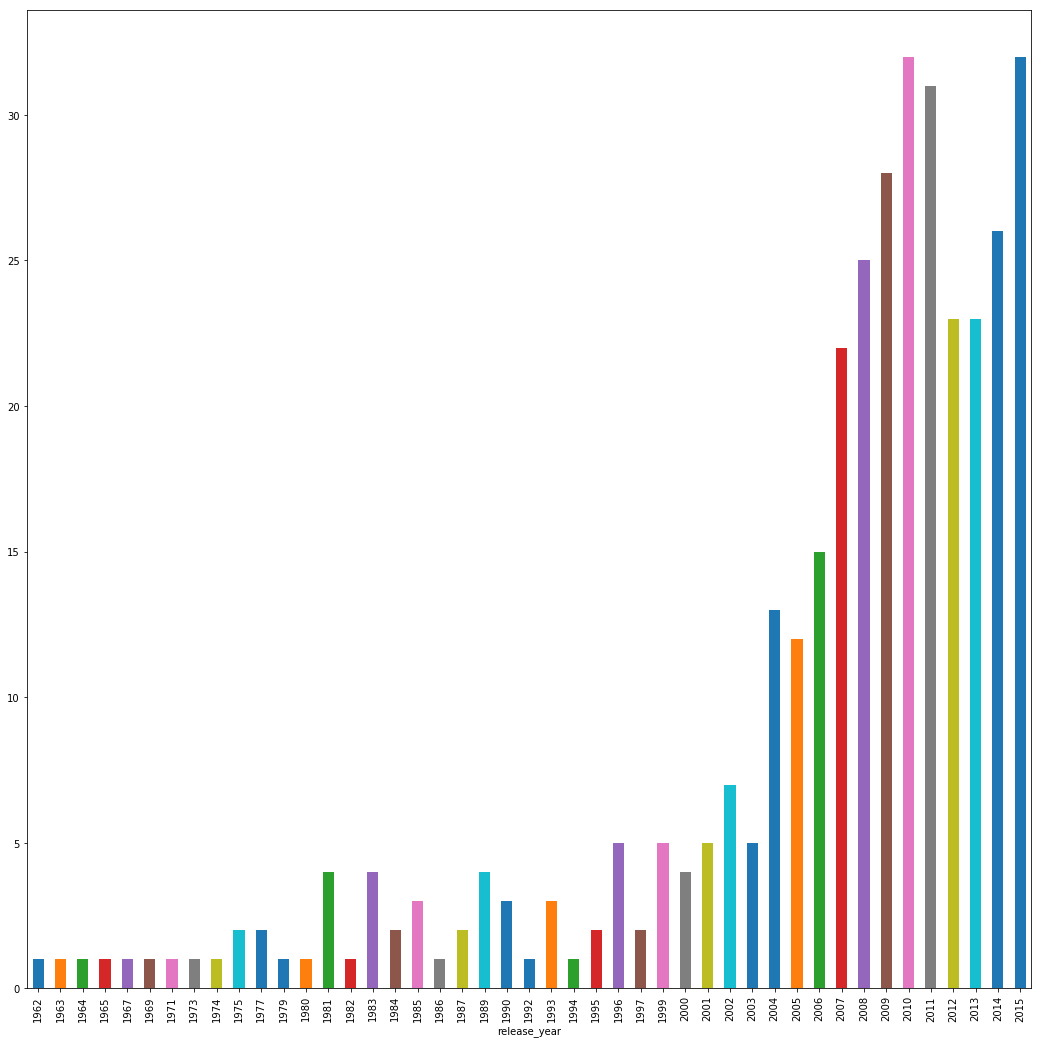

In [10]:
# 请继续探索数据，解决你额外的研究问题。
#   如果有其它问题要调查，
#   请根据需要添加更多标题。
popular_df = melted.query('genres_uniq==\'Adventure\'')

count_of_cast = popular_df.groupby('release_year')['release_year'].count()
count_of_cast.plot(kind='bar' ,figsize=(18, 18))

由上图可以看出，2000年以后，出品的电影 Adventure 类的电影比较多，相对于以前有了大幅度增长。2011年后，有了幅度有一定的降低和回涨。

<a id='conclusions'></a>
## 结论

* 大家对于Adventure类型的电影，相比于其他类型的电影更有兴趣。

* Adventure类型的电影，在2000年后，数量大幅增长，2011年达到顶峰，近几年可能再次兴起。

In [11]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295